<a href="https://colab.research.google.com/github/Blackman9t/Machine_Learning/blob/master/understanding_multiple_linear_regression_with_sklearn.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


<h3>About this Notebook</h3>
In this notebook, we learn how to use scikit-learn to implement Multiple linear regression. <br>
Multiple Linear Regression involves two or more independent variables and one dependent variable.<br>
The key point in Linear Regression is that the dependent variable must be continous and cannot be a categorical variable. However the independent variables can be categorical or continous.<br>
We shall download a dataset that is related to fuel consumption and Carbon dioxide emission of cars. <br>
Then, we split our data into training and test sets, create a model using training set, <br>
Evaluate your model using test set, and finally use model to predict unknown value


See Direct [link](https://drive.google.com/file/d/1Apxb-KxuagxhryXmT4UJA0U-2PgvdRer/view?usp=sharing) to The Data.

In [0]:
# importing required libraries

import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import pylab as pl
import numpy as np

<h2 id="understanding_data">Understanding the Data</h2>

### `FuelConsumption.csv`:
We have downloaded a fuel consumption dataset, **`FuelConsumption.csv`**, which contains model-specific fuel consumption ratings and estimated carbon dioxide emissions for new light-duty vehicles for retail sale in Canada. [Dataset source](http://open.canada.ca/data/en/dataset/98f1a129-f628-4ce4-b24d-6f16bf24dd64)

- **MODELYEAR** e.g. 2014
- **MAKE** e.g. Acura
- **MODEL** e.g. ILX
- **VEHICLE CLASS** e.g. SUV
- **ENGINE SIZE** e.g. 4.7
- **CYLINDERS** e.g 6
- **TRANSMISSION** e.g. A6
- **FUELTYPE** e.g. z
- **FUEL CONSUMPTION in CITY(L/100 km)** e.g. 9.9
- **FUEL CONSUMPTION in HWY (L/100 km)** e.g. 8.9
- **FUEL CONSUMPTION COMB (L/100 km)** e.g. 9.2
- **CO2 EMISSIONS (g/km)** e.g. 182   --> low --> 0


Let's import the data set from Github using the !wget command

In [14]:
!wget -O fuel_data.csv https://raw.githubusercontent.com/Blackman9t/Machine_Learning/master/Original_2000_2014_Fuel_Consumption_Ratings.csv

--2019-05-10 01:18:22--  https://raw.githubusercontent.com/Blackman9t/Machine_Learning/master/Original_2000_2014_Fuel_Consumption_Ratings.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 151.101.0.133, 151.101.64.133, 151.101.128.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|151.101.0.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 966474 (944K) [text/plain]
Saving to: ‘fuel_data.csv’

fuel_data.csv       100%[===================>] 943.82K  --.-KB/s    in 0.06s   

2019-05-10 01:18:22 (15.3 MB/s) - ‘fuel_data.csv’ saved [966474/966474]



### let's read the file into pandas dataframe

In [15]:
df = pd.read_csv('fuel_data.csv')

df.head()

,MODEL_YEAR,MAKE,MODEL,VEHICLE_CLASS,ENGINE_SIZE(L),CYLINDERS,TRANSMISSION,FUEL_TYPE,FUEL_CONSUMPTION_CITY(L/100km),HWY_(L/100km),COMB_(L/100km),COMB_(mpg),CO2_EMISSIONS(g/km)
0,2000,ACURA,1.6EL,COMPACT,1.6,4,A4,X,9.2,6.7,8.1,35,186
1,2000,ACURA,1.6EL,COMPACT,1.6,4,M5,X,8.5,6.5,7.6,37,175
2,2000,ACURA,3.2TL,MID-SIZE,3.2,6,AS5,Z,12.2,7.4,10.0,28,230
3,2000,ACURA,3.5RL,MID-SIZE,3.5,6,A4,Z,13.4,9.2,11.5,25,264
4,2000,ACURA,INTEGRA,SUBCOMPACT,1.8,4,A4,X,10.0,7.0,8.6,33,198


Let's confirm the shape

In [16]:
df.shape

(14343, 13)

Let's confirm the right data types exist per column

In [17]:
df.dtypes

MODEL_YEAR                          int64
MAKE                               object
MODEL                              object
VEHICLE_CLASS                      object
ENGINE_SIZE(L)                    float64
CYLINDERS                           int64
TRANSMISSION                       object
FUEL_TYPE                          object
FUEL_CONSUMPTION_CITY(L/100km)    float64
HWY_(L/100km)                     float64
COMB_(L/100km)                    float64
COMB_(mpg)                          int64
CO2_EMISSIONS(g/km)                 int64
dtype: object

Let's rename some columns for brevity

In [0]:
df.rename(columns={'FUEL_CONSUMPTION_CITY(L/100km)':'FUEL_CONS_CITY(L/100km)','CO2_EMISSIONS(g/km)':'CO2_EMISSIONS'}, inplace=True)

In [19]:
df.head()

,MODEL_YEAR,MAKE,MODEL,VEHICLE_CLASS,ENGINE_SIZE(L),CYLINDERS,TRANSMISSION,FUEL_TYPE,FUEL_CONS_CITY(L/100km),HWY_(L/100km),COMB_(L/100km),COMB_(mpg),CO2_EMISSIONS
0,2000,ACURA,1.6EL,COMPACT,1.6,4,A4,X,9.2,6.7,8.1,35,186
1,2000,ACURA,1.6EL,COMPACT,1.6,4,M5,X,8.5,6.5,7.6,37,175
2,2000,ACURA,3.2TL,MID-SIZE,3.2,6,AS5,Z,12.2,7.4,10.0,28,230
3,2000,ACURA,3.5RL,MID-SIZE,3.5,6,A4,Z,13.4,9.2,11.5,25,264
4,2000,ACURA,INTEGRA,SUBCOMPACT,1.8,4,A4,X,10.0,7.0,8.6,33,198


Let's select some features for MLR prediction. But first lets plot the correlation of variables in the data set


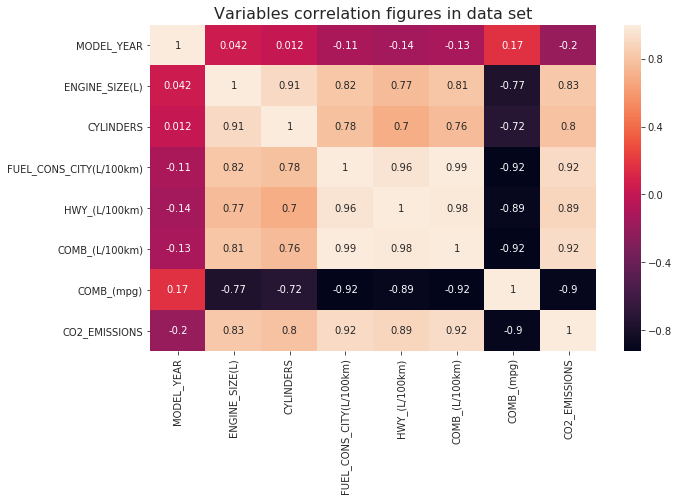

In [20]:
corr_data = df.corr()

sns.set_style('ticks')
plt.figure(figsize=(10,6))
plt.title('Variables correlation figures in data set', fontsize=16)

sns.heatmap(corr_data, annot=True)

plt.show()

Let's select the following four variables as our independent variables

In [21]:
independent = df[['ENGINE_SIZE(L)','CYLINDERS','FUEL_CONS_CITY(L/100km)','COMB_(L/100km)']]

independent.head()

,ENGINE_SIZE(L),CYLINDERS,FUEL_CONS_CITY(L/100km),COMB_(L/100km)
0,1.6,4,9.2,8.1
1,1.6,4,8.5,7.6
2,3.2,6,12.2,10.0
3,3.5,6,13.4,11.5
4,1.8,4,10.0,8.6


Let's visualize the relationship between each independent variable and the dependent variable

Text(0, 0.5, 'CO2_Emissions')

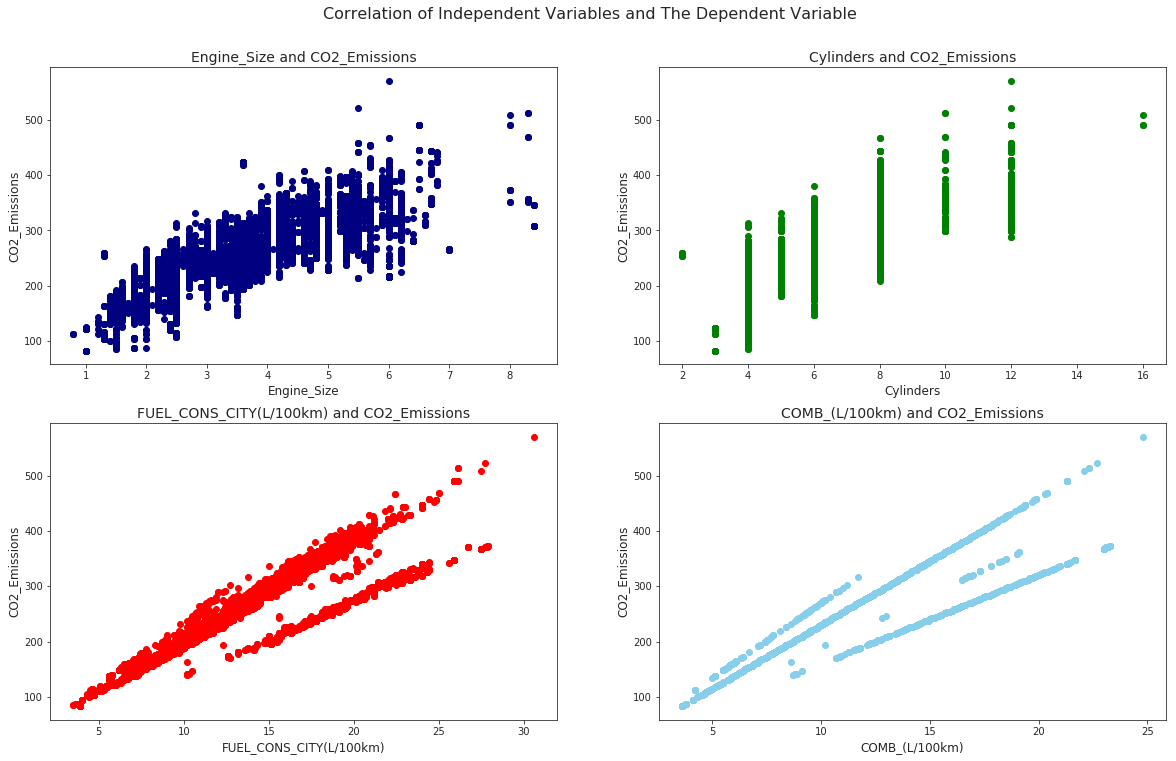

In [22]:
fig = plt.figure(figsize=(20,12))

plt.suptitle('Correlation of Independent Variables and The Dependent Variable', fontsize=16, y=0.95)
ax = fig.add_subplot(221)
ax1 = fig.add_subplot(222)
ax2 = fig.add_subplot(223)
ax3 = fig.add_subplot(224)

# Plotting Engine_Size and Co2_emissions
ax.scatter(x=independent['ENGINE_SIZE(L)'],y= df['CO2_EMISSIONS'], color='navy')
ax.set_title('Engine_Size and CO2_Emissions', fontsize=14)
ax.set_xlabel('Engine_Size', fontsize=12)
ax.set_ylabel('CO2_Emissions', fontsize=12)

# Plotting Cylinders and Co2_emissions
ax1.scatter(x=independent['CYLINDERS'],y= df['CO2_EMISSIONS'], color='green')
ax1.set_title('Cylinders and CO2_Emissions', fontsize=14)
ax1.set_xlabel('Cylinders', fontsize=12)
ax1.set_ylabel('CO2_Emissions', fontsize=12)

# Plotting FUEL_CONS_CITY(L/100km) and Co2_emissions
ax2.scatter(x=independent['FUEL_CONS_CITY(L/100km)'],y= df['CO2_EMISSIONS'], color='red')
ax2.set_title('FUEL_CONS_CITY(L/100km) and CO2_Emissions', fontsize=14)
ax2.set_xlabel('FUEL_CONS_CITY(L/100km)', fontsize=12)
ax2.set_ylabel('CO2_Emissions', fontsize=12)

# Plotting COMB_(L/100km) and Co2_emissions
ax3.scatter(x=independent['COMB_(L/100km)'],y= df['CO2_EMISSIONS'], color='skyblue')
ax3.set_title('COMB_(L/100km) and CO2_Emissions', fontsize=14)
ax3.set_xlabel('COMB_(L/100km)', fontsize=12)
ax3.set_ylabel('CO2_Emissions', fontsize=12)

We don't need to normalize the variables for Multiple Linear Regression, so let's just view the variables

In [26]:
X = independent.values

X

array([[ 1.6,  4. ,  9.2,  8.1],
       [ 1.6,  4. ,  8.5,  7.6],
       [ 3.2,  6. , 12.2, 10. ],
       ...,
       [ 3. ,  6. , 11.9, 10.3],
       [ 3.2,  6. , 11.4,  9.8],
       [ 3.2,  6. , 13.3, 11.2]])

Define the target variable

In [27]:
Y = df[['CO2_EMISSIONS']].values

Y

array([[186],
       [175],
       [230],
       ...,
       [237],
       [225],
       [258]])

### Creating train and test dataset
Train/Test Split involves splitting the dataset into training and testing sets respectively, which are mutually exclusive. After which, you train with the training set and test with the testing set. 
This will provide a more accurate evaluation on out-of-sample accuracy because the testing dataset is not part of the dataset that have been used to train the data. It is more realistic for real world problems.

This means that we know the outcome of each data point in this dataset, making it great to test with! And since this data has not been used to train the model, the model has no knowledge of the outcome of these data points. So, in essence, it’s truly an out-of-sample testing.



In [0]:
from sklearn.model_selection import train_test_split  # The function to split the data set into training and testing sets

In [0]:
train_x, test_x, train_y, test_y = train_test_split(X,Y, test_size=0.27, shuffle=True, random_state=47)

In [30]:
print('train_x length is',len(train_x),'\ntest_x length is',len(test_x),'\ntrain_y length is',len(train_y),'\ntest_y length is',len(test_y))

train_x length is 10470 
test_x length is 3873 
train_y length is 10470 
test_y length is 3873


### Multiple Regression Model

In reality, there are multiple variables that predict the Co2emission. When more than one independent variable is present, the process is called multiple linear regression. For example, predicting co2emission using FUELCONSUMPTION_COMB, EngineSize and Cylinders of cars. The good thing here is that Multiple linear regression is the extension of simple linear regression model.

In [0]:
from sklearn.linear_model import LinearRegression

mlr = LinearRegression()

### Train the model

In [32]:
mlr.fit(X,Y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

### print the coefficients of the model parameters

In [33]:
# The Slope or gradient
slope = mlr.coef_

# the intercept or bias unit
intercept = mlr.intercept_

print('Slope =', slope,'\nIntercept = ',intercept)

Slope = [[ 5.5140746   5.05050613 -1.44032344 15.68854857]] 
Intercept =  [44.0302154]


Therefore our MLR model equation is 

### $y_{hat} = b0 + b1x1 + b2x2 + b3x3 + b4x4$<br>
<br>
which means given our model parameters above, we can make predictions by substituting the slope and intercept values like this:-
<br>

### $y_{hat} = 44.0302154 + 46.31822662(x1) + 80.808098(x2) + -44.07389711(x3) + 389.07600461(x4)$<br>


where:<br>

$x1$ = Engine_Size<br>
$x2$ = Cylinders<br>
$x3$ = Fuel_Cons_City(L/100km)<br>
$x4$ = Comb_(L/100km)

So if we have the following details,  for an audi_car for example, we can easily predict CO2 emissions for the car below


ENGINE_SIZE(L) = 3.2<br>
CYLINDERS = 6<br>
FUEL_CONS_CITY(L/100km) = 12.2<br>
COMB_(L/100km) = 10.0

In [0]:
ENGINE_SIZE = 3.2
CYLINDERS = 6
FUEL_CONS_CITY = 12.2
COMB_L = 10.0

In [44]:
# next we substitute the variables in the MLR equation

acura_car_CO2 = intercept + (slope[0][0]*ENGINE_SIZE + slope[0][1]*CYLINDERS + slope[0][2]*FUEL_CONS_CITY + slope[0][3]*COMB_L)

print('CO2_Emissions for audi_car =',acura_car_CO2)

CO2_Emissions for audi_car = [231.29183068]


the actual value in the df data set for the prediction in row 2, acura 3.2L is actually 230 emissions... our model is doing really well on the training data

## Model Evaluation

**Ordinary Least Squares (OLS)**

OLS is a method for estimating the unknown parameters in a linear regression model. OLS chooses the parameters of a linear function of a set of explanatory variables by minimizing the sum of the squares of the differences between the target dependent variable and those predicted by the linear function. In other words, it tries to minimizes the sum of squared errors (SSE) or mean squared error (MSE) between the target variable (y) and our predicted output ( y^ ) over all samples in the dataset.

OLS can find the best parameters using of the following methods: - Solving the model parameters analytically using closed-form equations - Using an optimization algorithm (Gradient Descent, Stochastic Gradient Descent, Newton’s Method, etc.)

### Prediction

In [0]:
y_hat = mlr.predict(test_x)

**$R^2$ or Coefficient of determination**

Returns the coefficient of determination R^2 of the prediction.

**sklearn.metrics.r2_score(y_true, y_pred, sample_weight=None, multioutput=’uniform_average’)**

The coefficient R^2 is defined as (1 - u/v), where u is the residual
sum of squares ((y_true - y_pred) ** 2).sum() and v is the total
sum of squares ((y_true - y_true.mean()) ** 2).sum().
The best possible score is 1.0 and it can be negative (because the
model can be arbitrarily worse). A constant model that always
predicts the expected value of y, disregarding the input features,
would get a R^2 score of 0.0.

To find the $R^2$ we use the .score() function on our model


Finding the MSE, the lower the better

In [0]:
from sklearn.metrics import mean_squared_error, r2_score

In [38]:
MSE = mean_squared_error(y_hat, test_y)

print('Residual sum of squares or MSE: %.2f' % MSE)

Residual sum of squares or MSE: 490.70


Finding the RMSE, which is the square root of the MSE

In [39]:
RMSE = MSE**0.5

RMSE

22.151636734256364

**Finding the RMSE as a percentage of the range of the target variable.
The lower the percentage the better the model**

First we find the range of the target variable

In [40]:
y_range = test_y.max() - test_y.min()
y_range

430

Next we compute the RMSE as a percent of the range

In [41]:
error_range = (RMSE / y_range) * 100

error_range

5.151543426571247

Finally let's compute the $R^2$ score or coefficient of determination of our model prediction.<br>
The highest value is 1... So the closer to 1, the better the score

In [42]:
r2_score(test_y, y_hat)  # pass in the true values first, then the predicted values.

0.8601623559586588

## Summary

We have seen how Multiple Linear regression works step by step using Scikit Learn Library.<br>

We built a MLR Model from scratch by first determining correlated variables, selecting four of them  and shaping them into a 2D array.<br>
Then using sklearn library to split the data into training and testing sets.<br>
Then training the model with the tarining data set using the  fit() function,<br>
And using the model to make predictions on the test data set that is not yet known to the model(out of sample data set)<br>
Finally evaluating the model using MSE, RMSE and $R^2$ score.

Our Model performed quite good on the out-of-sample data set.<br>
With an error_range of only 5% of the target variable range and a coefficient of determination of 0.86 out of 1.0

### let's plot the model performance on the Test data set using a Histplot and Regplot.

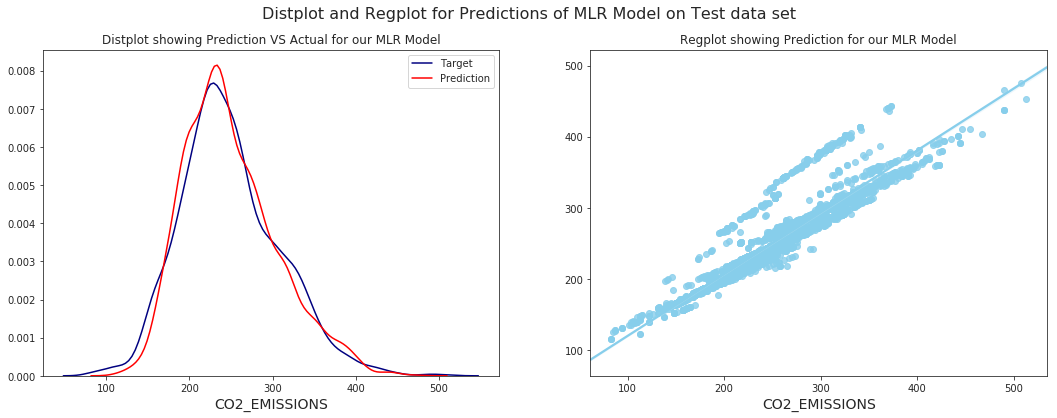

In [43]:
fig = plt.figure(figsize=(18, 6))
plt.suptitle('Distplot and Regplot for Predictions of MLR Model on Test data set', fontsize=16)

ax = fig.add_subplot(121)
ax1 = fig.add_subplot(122)

# plotting the Distplot
sns.distplot(test_y, hist=False, label='Target', color='navy', ax=ax)
sns.distplot(y_hat, hist=False, label='Prediction', color='red', ax=ax)
ax.set_xlabel('CO2_EMISSIONS', fontsize=14)
ax.set_title('Distplot showing Prediction VS Actual for our MLR Model')

# plotting the Regplot
sns.regplot(test_y.squeeze(), y_hat.squeeze(), color='skyblue', ax=ax1)
ax1.set_xlabel('CO2_EMISSIONS', fontsize=14)
ax1.set_title('Regplot showing Prediction for our MLR Model')

plt.show()